# 1. Import dependents

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from perceptron import Perceptron

# 2. Load data and preprocessing data

In [2]:
df = pd.read_csv('Surgical-deepnet.csv')
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [3]:
print(df.isna().sum())

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train, Test split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size=.25, random_state=42)

print(f'x_train: {len(x_train)}, y_train: {len(y_train)}')
print(f'x_validation: {len(x_validation)}, y_validation: {len(y_validation)}')
print(f'x_test: {len(x_test)}, y_test: {len(y_test)}')

x_train: 11708, y_train: 11708
x_validation: 732, y_validation: 732
x_test: 2195, y_test: 2195


# 4. Initial, train and evaluate model

In [7]:
def train_model(activation_function):
    model = Perceptron(
        learning_rate=.0001,
        epochs=50,
        num_features=24,
        activation=activation_function
    )
    
    model.train(x_train, y_train, x_validation, y_validation)
    
    fig, (ax_1, ax_2, ax_3) = plt.subplots(1, 3, figsize=(20, 5))
    ax_1.plot(model.train_losses, label='Train Loss')
    ax_1.plot(model.validation_losses, label='Validation Loss')
    ax_1.legend()
    ax_1.set_title("Loss")
    ax_1.set_xlabel("Epochs")
    ax_1.set_ylabel("loss")
    
    ax_2.plot(model.train_accuracies, label='Train Accuracy')
    ax_2.plot(model.validation_accuracies, label='Validation Accuracy')
    ax_2.legend()
    ax_2.set_title("Accuracy")
    ax_2.set_xlabel("Epochs")
    ax_2.set_ylabel("Accuracy")
    
    y_pred = model.predict(x_test).reshape(-1)
    y_pred = np.where(y_pred > .5, 1, 0)
    
    matrix = confusion_matrix(y_test, y_pred)

    im = ax_3.imshow(matrix, interpolation='nearest', cmap='Blues')
    fig.colorbar(im, ax=ax_3)

    ax_3.set_title('Confusion Matrix')
    ax_3.set_xlabel('Predicted Labels')
    ax_3.set_ylabel('True Labels')
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax_3.text(j, i, str(matrix[i, j]), ha='center', va='center', color='black', fontsize=12)
    
    plt.show()

Epoch: 1
Train Loss: 0.42082027982425413, Train Accuracy: 0.6411855141783396
Validation Loss: 0.4934072577162787, Validation Accuracy: 0.5376914807847353
Epoch: 2
Train Loss: 0.3997126428814763, Train Accuracy: 0.6570720874615648
Validation Loss: 0.47808235592025883, Validation Accuracy: 0.5502553077129804
Epoch: 3
Train Loss: 0.3826117904827049, Train Accuracy: 0.6738981892722925
Validation Loss: 0.46287880006514265, Validation Accuracy: 0.5679924751410911
Epoch: 4
Train Loss: 0.3671655339917463, Train Accuracy: 0.6908097027673386
Validation Loss: 0.44791962227343657, Validation Accuracy: 0.5857296425692018
Epoch: 5
Train Loss: 0.3533467032321221, Train Accuracy: 0.7108814485821661
Validation Loss: 0.4340620365119518, Validation Accuracy: 0.6012496640687988
Epoch: 6
Train Loss: 0.34162240388458215, Train Accuracy: 0.731892722924496
Validation Loss: 0.421962405370808, Validation Accuracy: 0.6152915882827197
Epoch: 7
Train Loss: 0.3321328474863385, Train Accuracy: 0.747950119576358
Vali

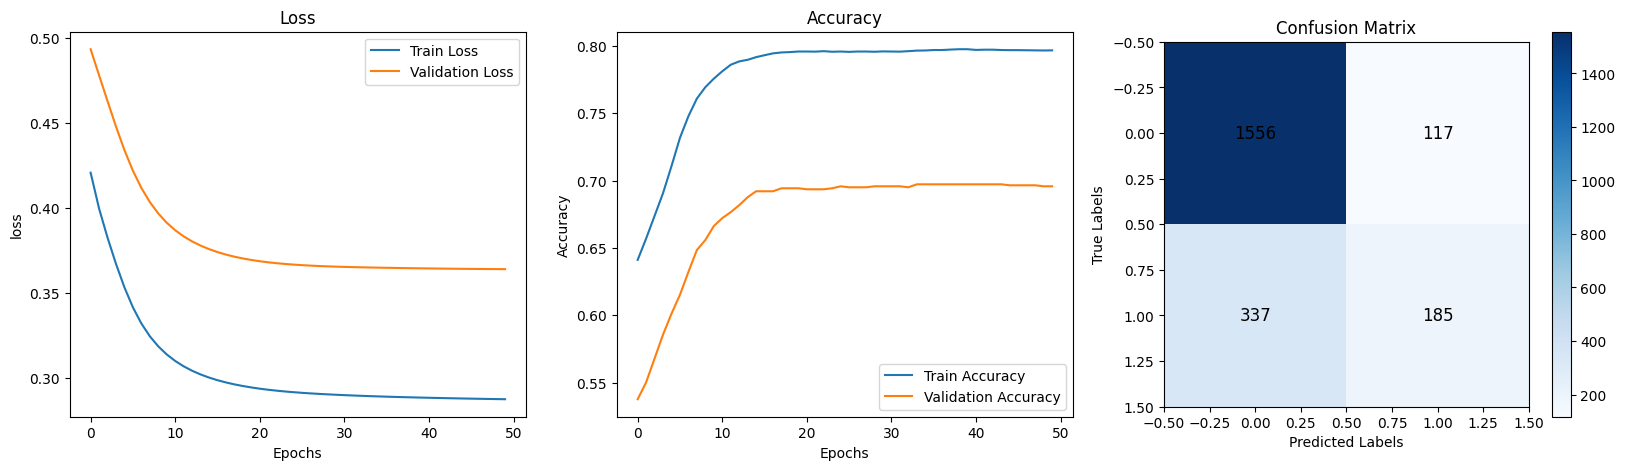

In [8]:
train_model('sigmoid')

Epoch: 1
Train Loss: 0.6895678381812763, Train Accuracy: 0.6696276050563718
Validation Loss: 0.6670145149950759, Validation Accuracy: 0.5642972319269014
Epoch: 2
Train Loss: 0.4733846803850975, Train Accuracy: 0.6753501879057054
Validation Loss: 0.5329934215761344, Validation Accuracy: 0.5642972319269014
Epoch: 3
Train Loss: 0.40355645219015124, Train Accuracy: 0.6876494704475572
Validation Loss: 0.48656558466166183, Validation Accuracy: 0.5783391561408223
Epoch: 4
Train Loss: 0.37024321993278847, Train Accuracy: 0.7166894431158183
Validation Loss: 0.45349844495737796, Validation Accuracy: 0.6071620532115023
Epoch: 5
Train Loss: 0.34608671553335957, Train Accuracy: 0.7415442432524769
Validation Loss: 0.4290255935121964, Validation Accuracy: 0.6285944638538027
Epoch: 6
Train Loss: 0.32964577753890695, Train Accuracy: 0.7592244619063888
Validation Loss: 0.412550264440747, Validation Accuracy: 0.6485487772104273
Epoch: 7
Train Loss: 0.31907148628031584, Train Accuracy: 0.7701571574991459


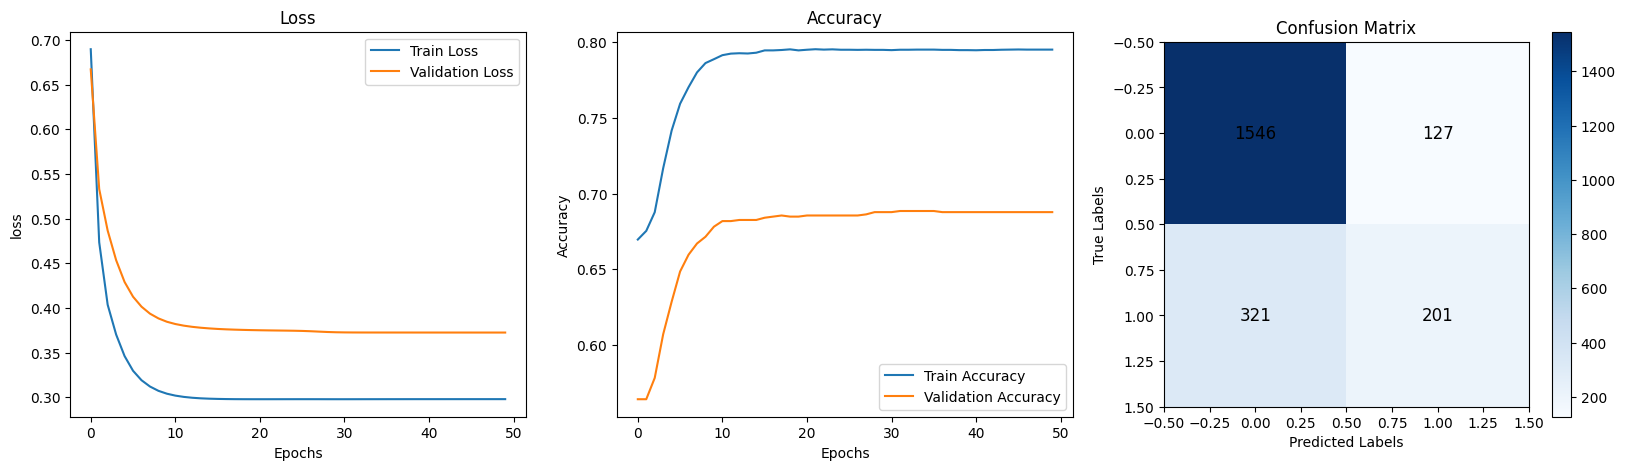

In [9]:
train_model('tanh')

Epoch: 1
Train Loss: 0.9638172480062539, Train Accuracy: 0.6525452681926888
Validation Loss: 0.6566781948858388, Validation Accuracy: 0.6212039774254233
Epoch: 2
Train Loss: 0.4610891953985249, Train Accuracy: 0.698923812777588
Validation Loss: 0.42176716208246817, Validation Accuracy: 0.6677640419242139
Epoch: 3
Train Loss: 0.3221576244041221, Train Accuracy: 0.7303553126067646
Validation Loss: 0.3554137716343444, Validation Accuracy: 0.6891964525665144
Epoch: 4
Train Loss: 0.28141474248442183, Train Accuracy: 0.7523061154765972
Validation Loss: 0.33736359120661785, Validation Accuracy: 0.6928916957807041
Epoch: 5
Train Loss: 0.265041770786705, Train Accuracy: 0.7653741031773147
Validation Loss: 0.33200114675189024, Validation Accuracy: 0.6995431335662456
Epoch: 6
Train Loss: 0.25700784397652826, Train Accuracy: 0.7715237444482406
Validation Loss: 0.33173022362105914, Validation Accuracy: 0.6980650362805697
Epoch: 7
Train Loss: 0.2547467850531097, Train Accuracy: 0.776990092244619
Val

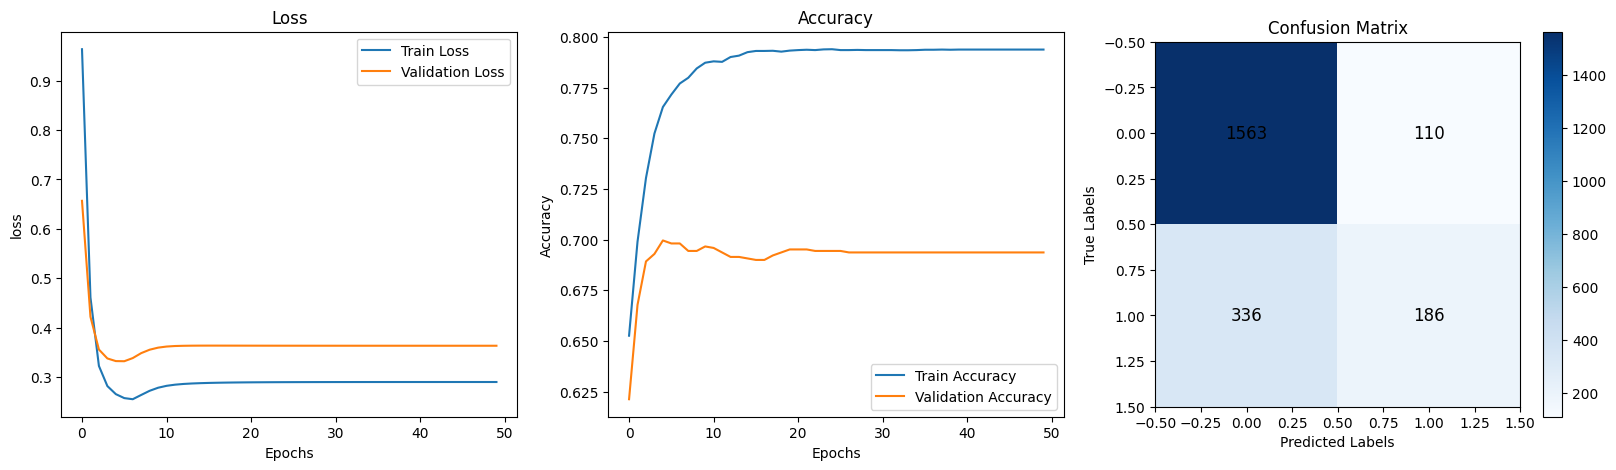

In [10]:
train_model('relu')

Epoch: 1
Train Loss: 0.7364540149659488, Train Accuracy: 0.5963443799111718
Validation Loss: 0.5565781493331935, Validation Accuracy: 0.6544611663531309
Epoch: 2
Train Loss: 0.38313882253460374, Train Accuracy: 0.7306115476597198
Validation Loss: 0.39936473972858944, Validation Accuracy: 0.6736764310669175
Epoch: 3
Train Loss: 0.3021966005014179, Train Accuracy: 0.744448240519303
Validation Loss: 0.3613529185580093, Validation Accuracy: 0.6818059661381349
Epoch: 4
Train Loss: 0.2789736239959565, Train Accuracy: 0.756576699692518
Validation Loss: 0.347868037086626, Validation Accuracy: 0.6877183552808385
Epoch: 5
Train Loss: 0.26732773248052666, Train Accuracy: 0.7636658694909464
Validation Loss: 0.34184633660984454, Validation Accuracy: 0.6914135984950283
Epoch: 6
Train Loss: 0.2612945292241754, Train Accuracy: 0.7684489238127776
Validation Loss: 0.33939597852827724, Validation Accuracy: 0.6936307444235421
Epoch: 7
Train Loss: 0.25907924705348906, Train Accuracy: 0.7739152716091562
Val

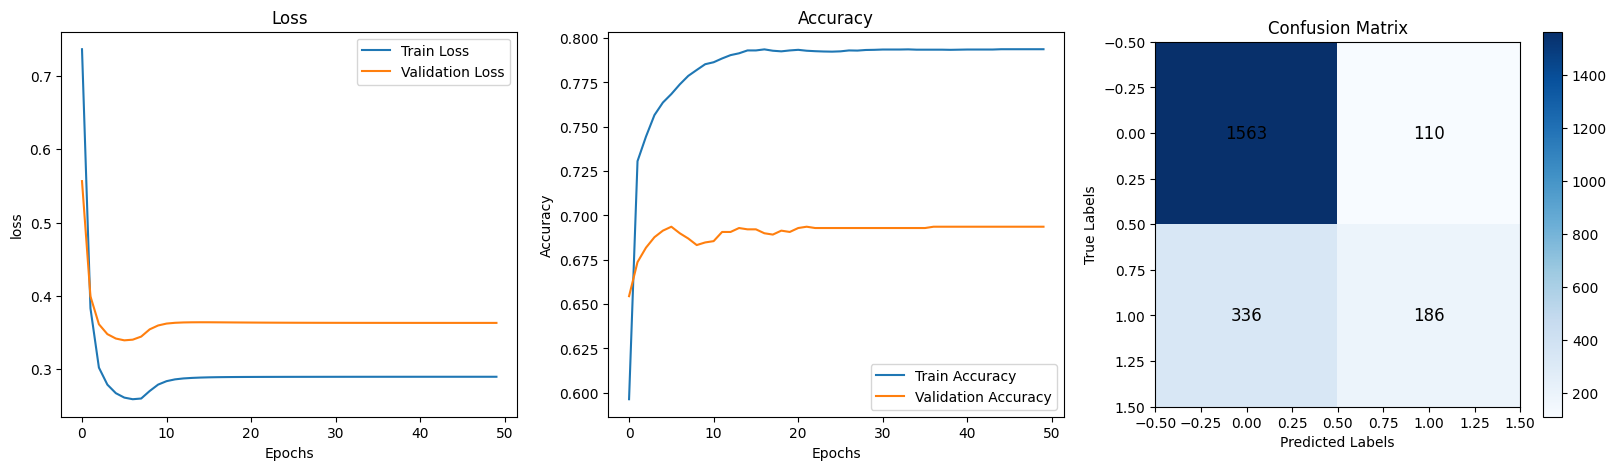

In [11]:
train_model('leaky_relu')

Epoch: 1
Train Loss: 0.7207127139994218, Train Accuracy: 0.6668944311581825
Validation Loss: 0.4468997764193157, Validation Accuracy: 0.652244020424617
Epoch: 2
Train Loss: 0.3552225826029553, Train Accuracy: 0.7074649812094295
Validation Loss: 0.3513953809299284, Validation Accuracy: 0.6832840634238108
Epoch: 3
Train Loss: 0.29484286512636265, Train Accuracy: 0.7390673044072429
Validation Loss: 0.33245856253966594, Validation Accuracy: 0.7017602794947595
Epoch: 4
Train Loss: 0.2736412406701357, Train Accuracy: 0.7576870515886573
Validation Loss: 0.3295755157734411, Validation Accuracy: 0.7061945713517872
Epoch: 5
Train Loss: 0.26558083307078956, Train Accuracy: 0.7709258626580117
Validation Loss: 0.33725371563724743, Validation Accuracy: 0.7121069604944907
Epoch: 6
Train Loss: 0.2714538050046394, Train Accuracy: 0.7781858558250768
Validation Loss: 0.34965404720170745, Validation Accuracy: 0.7061945713517872
Epoch: 7
Train Loss: 0.2790163742947715, Train Accuracy: 0.7852750256235053
Va

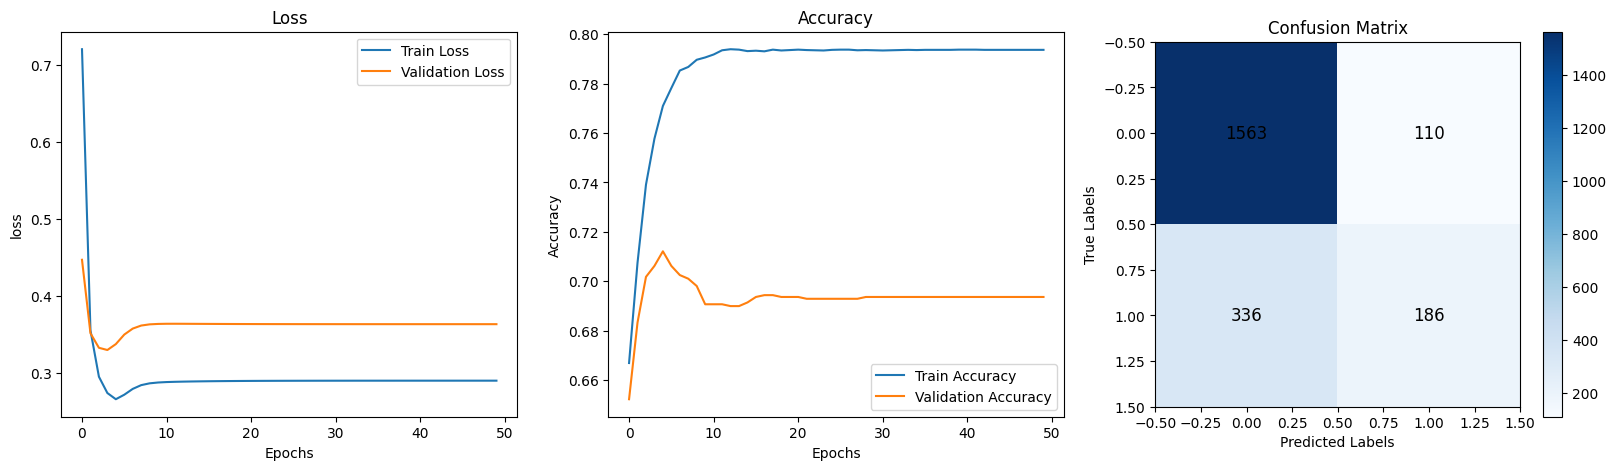

In [12]:
train_model('elu')

Epoch: 1
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 2
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 3
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 4
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 5
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 6
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443
Validation Loss: 0.7704918032786885, Validation Accuracy: 0.22950819672131148
Epoch: 7
Train Loss: 0.7437649470447557, Train Accuracy: 0.2562350529552443


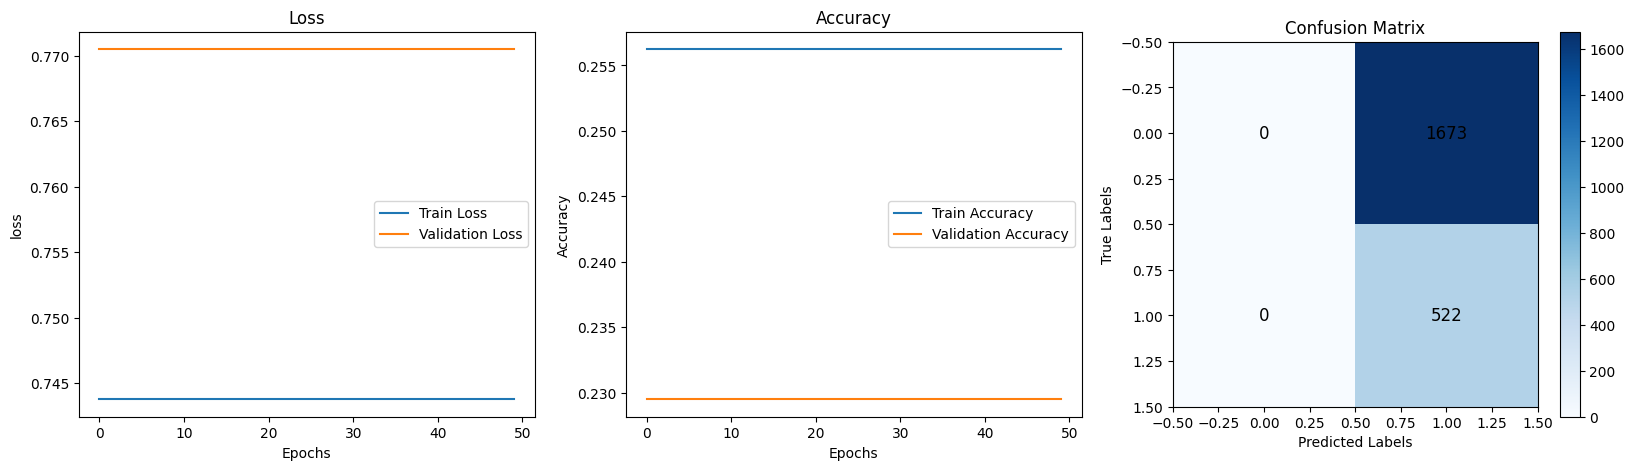

In [13]:
train_model('softmax')

Epoch: 1
Train Loss: 1.1136262806428796, Train Accuracy: 0.6331568158524086
Validation Loss: 0.7685876620041153, Validation Accuracy: 0.596076323568933
Epoch: 2
Train Loss: 0.5256068772055636, Train Accuracy: 0.6939699350871199
Validation Loss: 0.517689827063504, Validation Accuracy: 0.6285944638538027
Epoch: 3
Train Loss: 0.39165062460697964, Train Accuracy: 0.7270242569183464
Validation Loss: 0.4369972711245758, Validation Accuracy: 0.6603735554958344
Epoch: 4
Train Loss: 0.341267000640083, Train Accuracy: 0.7535872907413734
Validation Loss: 0.40610430779360535, Validation Accuracy: 0.6825450147809728
Epoch: 5
Train Loss: 0.31797797605848716, Train Accuracy: 0.7713529210796037
Validation Loss: 0.3911245580253578, Validation Accuracy: 0.6921526471378662
Epoch: 6
Train Loss: 0.3063390687696924, Train Accuracy: 0.7779296207721216
Validation Loss: 0.38273244500038084, Validation Accuracy: 0.6951088417092179
Epoch: 7
Train Loss: 0.300179424349299, Train Accuracy: 0.7810898530919029
Valida

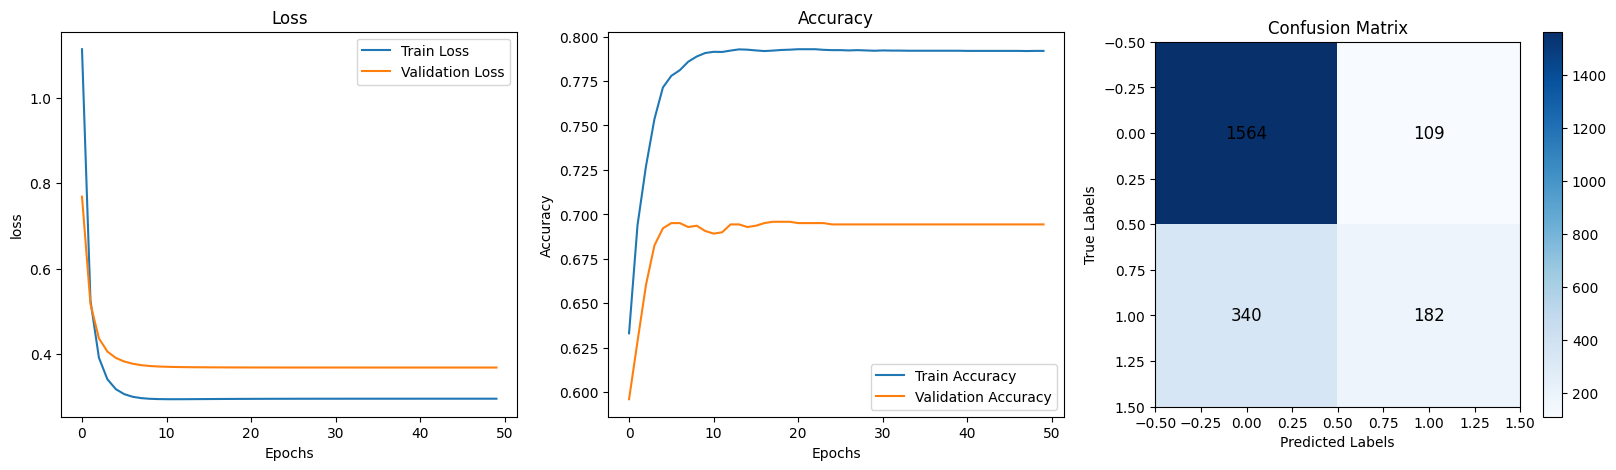

In [14]:
train_model('linear')